Profesor: Alvaro Javier Cangrejo

*  **Datos Faltantes**

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('california_restaurants_NaN.csv', sep=',', dtype = {'Zip Code' : 'str'})
data = data.drop(data.index[-1]) ## Elimina el ultimo registro del data frame

df = pd.read_csv('example_1.csv', sep=',', index_col="date")  ## , dtype = {'date' : 'str',
                                                              ##      'identificacion': 'str'}

## data['date'] = pd.to_datetime(df['date'])
## df.set_index(['columnas'], inplace = True)
df.head()

,Stock_A,Stock_B,Stock_C
date,,,
2023-01-01,20.0,NaN,19.0
2023-01-02,465.0,NaN,NaN
2023-01-03,NaN,14.0,86.0
2023-01-04,NaN,25.0,19.0
2023-01-05,25.0,9.0,NaN


In [ ]:
df.shape

(6, 3)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Yelp URL           1272 non-null   object 
 1   Name               1272 non-null   object 
 2   Street Address     1272 non-null   object 
 3   Zip Code           1258 non-null   object 
 4   City               1262 non-null   object 
 5   State              1258 non-null   object 
 6   Price Range        1066 non-null   object 
 7   Phone              1195 non-null   object 
 8   Rating             1269 non-null   float64
 9   Number of Reviews  1269 non-null   float64
 10  Website            973 non-null    object 
 11  Menu Link          591 non-null    object 
 12  Image 1            1267 non-null   object 
 13  Image 2            1261 non-null   object 
 14  Image 3            1254 non-null   object 
 15  Category 1         1272 non-null   object 
 16  Category 2         1004 

In [ ]:
df['Stock_A'].value_counts().reset_index().sort_values(by='Stock_A')

,Stock_A,count
0,20.0,1
2,25.0,1
3,75.0,1
1,465.0,1


<Axes: xlabel='date'>

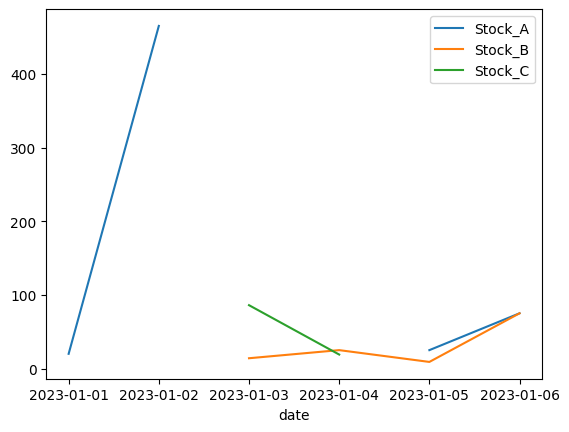

In [ ]:
df.plot() ## No existe continuidad dado que tenemos presencia de datos faltantes

In [ ]:
## Ahora, ¿como manejamos los datos faltantes ?, dado que están presentes en fechas distintas.

## primero identifiquemos los NAN

df['Stock_A'].isna()

,Stock_A
date,
2023-01-01,False
2023-01-02,False
2023-01-03,True
2023-01-04,True
2023-01-05,False
2023-01-06,False


In [ ]:
np.any(df['Stock_A'].isna())

True

In [ ]:
df[['Stock_A', 'Stock_B']].isna().sum()

,0
Stock_A,2
Stock_B,2


In [ ]:
df.loc[df['Stock_A'].isna()]

,Stock_A,Stock_B,Stock_C
date,,,
2023-01-03,NaN,14.0,86.0
2023-01-04,NaN,25.0,19.0


In [ ]:
df.isna().sum()

,0
Stock_A,2
Stock_B,2
Stock_C,2


In [ ]:
df['Stock_B'].notna()

,Stock_B
date,
2023-01-01,False
2023-01-02,False
2023-01-03,True
2023-01-04,True
2023-01-05,True
2023-01-06,True


In [ ]:
df[df['Stock_B'].notna()]

,Stock_A,Stock_B,Stock_C
date,,,
2023-01-03,NaN,14.0,86.0
2023-01-04,NaN,25.0,19.0
2023-01-05,25.0,9.0,NaN
2023-01-06,75.0,75.0,19.0


In [ ]:
## otros métodos similares pero más antiguos son (isnull(), notnull())
df[df.notnull()]

,Stock_A,Stock_B,Stock_C
date,,,
2023-01-01,20.0,NaN,19.0
2023-01-02,465.0,NaN,NaN
2023-01-03,NaN,14.0,86.0
2023-01-04,NaN,25.0,19.0
2023-01-05,25.0,9.0,NaN
2023-01-06,75.0,75.0,19.0


* Que ocurre con la presencia de estos valores al aplicar funciones matematicas.

In [ ]:
df['Stock_A'] * 100
## La computadora no entiende al menos que le diga lo contrario que hacer con los NaN, entonces a partir de cualquier operación siempre
## replicará los NaN.

,Stock_A
date,
2023-01-01,2000.0
2023-01-02,46500.0
2023-01-03,NaN
2023-01-04,NaN
2023-01-05,2500.0
2023-01-06,7500.0


In [ ]:
## Ahora convertir los NaN a cero no tiene sentido dado el contexto de las acciones, verdad ?
## Por tanto, si falta alguna entrada, faltara tambien la salida (esto se llama propagación de valores faltantes).

In [ ]:
df['Stock_A'] + df['Stock_B']

,0
date,
2023-01-01,NaN
2023-01-02,NaN
2023-01-03,NaN
2023-01-04,NaN
2023-01-05,34.0
2023-01-06,150.0


In [ ]:
## Ahora, como lo manejamos. Vamos al data frame de restaurants
np.any(data.isna())

True

In [ ]:
data

,Yelp URL,Name,Street Address,Zip Code,City,State,Price Range,Phone,Rating,Number of Reviews,Website,Menu Link,Image 1,Image 2,Image 3,Category 1,Category 2,Category 3
0,https://www.yelp.com/biz/in-s%C4%ABt-coffee-bu...,In-sīt Coffee,6930 Beach Blvd Ste L301,90621.0,Buena Park,CA,$,(714) 670-6958,4.0,583.0,NaN,NaN,https://s3-media0.fl.yelpcdn.com/bphoto/TgX8pH...,https://s3-media0.fl.yelpcdn.com/bphoto/e9oSgM...,https://s3-media0.fl.yelpcdn.com/bphoto/gJUxfa...,Coffee & Tea,Waffles,Breakfast & Brunch
1,https://www.yelp.com/biz/tierra-mia-coffee-wes...,Tierra Mia Coffee,2301 S Azusa Ave,91792.0,West Covina,CA,$$,NaN,4.0,288.0,www.tierramiacoffee.com,NaN,https://s3-media0.fl.yelpcdn.com/bphoto/qQC8B3...,https://s3-media0.fl.yelpcdn.com/bphoto/QhVb_D...,https://s3-media0.fl.yelpcdn.com/bphoto/7RiGO2...,Coffee & Tea,NaN,NaN
2,https://www.yelp.com/biz/julies-cafe-chino-3,Julie's Cafe,3746 Riverside Dr,91710.0,Chino,CA,$$,(909) 992-0013,4.5,179.0,www.juliescafes.com,www.juliescafes.com/menu/,https://s3-media0.fl.yelpcdn.com/bphoto/__RSTK...,https://s3-media0.fl.yelpcdn.com/bphoto/bdPEPF...,https://s3-media0.fl.yelpcdn.com/bphoto/7d4bRB...,Bagels,Breakfast & Brunch,Cafes
3,https://www.yelp.com/biz/bonanza-bakery-and-ca...,Bonanza Bakery & Cafe,"20657 Golden Springs Dr Ste - 104,105",91789.0,Diamond Bar,CA,$$,(909) 274-7121,4.0,76.0,www.bonanzabakerycafe.com,NaN,https://s3-media0.fl.yelpcdn.com/bphoto/ca8BLo...,https://s3-media0.fl.yelpcdn.com/bphoto/FVqd4a...,https://s3-media0.fl.yelpcdn.com/bphoto/3iL4th...,Desserts,Coffee & Tea,Breakfast & Brunch
4,https://www.yelp.com/biz/dripp-fullerton,Dripp,,NaN,500 N Harbor Blvd,NaN,$,(714) 441-1003,4.0,938.0,www.dripp.com,NaN,https://s3-media0.fl.yelpcdn.com/bphoto/zdCaor...,https://s3-media0.fl.yelpcdn.com/bphoto/Tpbn2s...,https://s3-media0.fl.yelpcdn.com/bphoto/nXoE1M...,Coffee & Tea,Ice Cream & Frozen Yogurt,Sandwiches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,https://www.yelp.com/biz/snooze-an-a-m-eatery-...,"Snooze, an A.M. Eatery",240 W Chapman Ave Ste 101,92866.0,Orange,CA,$$,(714) 769-6947,4.5,1538.0,www.snoozeeatery.com//?utm_source=yelp&utm_med...,www.snoozeeatery.com/food-menu/,https://s3-media0.fl.yelpcdn.com/bphoto/rjMFEB...,https://s3-media0.fl.yelpcdn.com/bphoto/pEdNjX...,https://s3-media0.fl.yelpcdn.com/bphoto/_wP-ll...,Breakfast & Brunch,American (Traditional),Cocktail Bars
1268,https://www.yelp.com/biz/ap-gu-jung-diamond-bar,Ap Gu Jung,20627 Golden Springs Dr Ste 2F,91789.0,Diamond Bar,CA,$$,(909) 594-3404,4.5,234.0,NaN,vavara007.wixsite.com/apgujungmenu,https://s3-media0.fl.yelpcdn.com/bphoto/mzrGVZ...,https://s3-media0.fl.yelpcdn.com/bphoto/dnHNJi...,https://s3-media0.fl.yelpcdn.com/bphoto/w3yv1s...,Korean,Soup,Seafood
1269,https://www.yelp.com/biz/yard-house-brea-4,Yard House,160 S Brea Blvd,92821.0,Brea,CA,$$,(714) 529-9273,3.5,1511.0,www.yardhouse.com/locations/ca/brea/brea-downt...,www.yardhouse.com/menu/mains/steaks-chops%3Fse...,https://s3-media0.fl.yelpcdn.com/bphoto/n8vOBh...,https://s3-media0.fl.yelpcdn.com/bphoto/k3Abev...,https://s3-media0.fl.yelpcdn.com/bphoto/DENhgb...,American (New),Vegetarian,Bars
1270,https://www.yelp.com/biz/club-33-anaheim-3,Club 33,1313 S Harbor Blvd,92802.0,Anaheim,CA,$$$$,NaN,4.5,1007.0,NaN,www.disneylandclub33.com/Dinner%2520Menu%2520P...,https://s3-media0.fl.yelpcdn.com/bphoto/pvYvET...,https://s3-media0.fl.yelpcdn.com/bphoto/wc_T0Y...,https://s3-media0.fl.yelpcdn.com/bphoto/bo0PYa...,French,Lounges,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Yelp URL           1272 non-null   object 
 1   Name               1272 non-null   object 
 2   Street Address     1272 non-null   object 
 3   Zip Code           1258 non-null   float64
 4   City               1262 non-null   object 
 5   State              1258 non-null   object 
 6   Price Range        1066 non-null   object 
 7   Phone              1195 non-null   object 
 8   Rating             1269 non-null   float64
 9   Number of Reviews  1269 non-null   float64
 10  Website            973 non-null    object 
 11  Menu Link          591 non-null    object 
 12  Image 1            1267 non-null   object 
 13  Image 2            1261 non-null   object 
 14  Image 3            1254 non-null   object 
 15  Category 1         1272 non-null   object 
 16  Category 2         1004 

In [ ]:
## ¿Que hacemos con los faltantes /// (Missing at random -MAR, KNN)
data.dropna()

,Yelp URL,Name,Street Address,Zip Code,City,State,Price Range,Phone,Rating,Number of Reviews,Website,Menu Link,Image 1,Image 2,Image 3,Category 1,Category 2,Category 3
2,https://www.yelp.com/biz/julies-cafe-chino-3,Julie's Cafe,3746 Riverside Dr,91710,Chino,CA,$$,(909) 992-0013,4.5,179.0,www.juliescafes.com,www.juliescafes.com/menu/,https://s3-media0.fl.yelpcdn.com/bphoto/__RSTK...,https://s3-media0.fl.yelpcdn.com/bphoto/bdPEPF...,https://s3-media0.fl.yelpcdn.com/bphoto/7d4bRB...,Bagels,Breakfast & Brunch,Cafes
6,https://www.yelp.com/biz/sul-and-beans-rowland...,Sul & Beans,1330 Fullerton Rd Unit 110,91748,Rowland Heights,CA,$$,(626) 581-1581,4.0,643.0,www.sulandbeans.com,www.sulandbeans.com/menu,https://s3-media0.fl.yelpcdn.com/bphoto/l4NVad...,https://s3-media0.fl.yelpcdn.com/bphoto/TC-TF4...,https://s3-media0.fl.yelpcdn.com/bphoto/ku9I_Q...,Desserts,Shaved Ice,Coffee & Tea
8,https://www.yelp.com/biz/ginkgo-katsu-diamond-bar,Ginkgo Katsu,1131 Brea Canyon Rd,91789,Diamond Bar,CA,$$,(909) 895-7808,4.5,328.0,ginkgokatsu.com,www.ginkgokatsu.com/menu,https://s3-media0.fl.yelpcdn.com/bphoto/qkoUPC...,https://s3-media0.fl.yelpcdn.com/bphoto/GRYdvA...,https://s3-media0.fl.yelpcdn.com/bphoto/iZW9yp...,Japanese,Bubble Tea,Coffee & Tea
9,https://www.yelp.com/biz/king-coffee-usa-anahe...,King Coffee USA,321 W Katella Ste 142,92802,Anaheim,CA,$,(714) 864-3874,3.5,74.0,kingcoffeeusa.com,kingcoffeeusa.com/pages/menu,https://s3-media0.fl.yelpcdn.com/bphoto/zo5D1-...,https://s3-media0.fl.yelpcdn.com/bphoto/46CWX4...,https://s3-media0.fl.yelpcdn.com/bphoto/vkmktN...,Coffee & Tea,Juice Bars & Smoothies,Sandwiches
10,https://www.yelp.com/biz/coffee-up-roastery-fu...,Coffee Up Roastery,1950 Sunny Crest Dr Ste 1000,92835,Fullerton,CA,$,(714) 519-3407,5.0,27.0,www.coffeeuproastery.com,coffeeuproastery.com/menu,https://s3-media0.fl.yelpcdn.com/bphoto/3aMNgz...,https://s3-media0.fl.yelpcdn.com/bphoto/WTjEM1...,https://s3-media0.fl.yelpcdn.com/bphoto/DbBuhb...,Coffee & Tea,Sandwiches,Cafes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,https://www.yelp.com/biz/lazy-dog-restaurant-a...,Lazy Dog Restaurant & Bar,1623 W Katella Ave,92867,Orange,CA,$$,(714) 769-7020,4.0,2286.0,lazydogrestaurants.com//?olonwp=z17TA_tz20aL5U...,order.lazydogrestaurants.com/menu/orange%3Folo...,https://s3-media0.fl.yelpcdn.com/bphoto/9S0Wki...,https://s3-media0.fl.yelpcdn.com/bphoto/5a936v...,https://s3-media0.fl.yelpcdn.com/bphoto/KbAj-r...,American (New),Comfort Food,Burgers
1254,https://www.yelp.com/biz/banana-bay-restaurant...,Banana Bay Restaurant,18230 Colima Rd,91748,Rowland Heights,CA,$$,(626) 839-5511,3.5,3380.0,www.bananabayrh.com,www.bananabayrh.com,https://s3-media0.fl.yelpcdn.com/bphoto/9wOhuk...,https://s3-media0.fl.yelpcdn.com/bphoto/mweaTU...,https://s3-media0.fl.yelpcdn.com/bphoto/16-jvl...,Thai,Chinese,Seafood
1259,https://www.yelp.com/biz/green-tomato-grill-brea,Green Tomato Grill,796 N Brea Blvd,92821,Brea,CA,$$,(714) 831-0958,4.0,942.0,greentomatogrill.com,www.greentomatogrill.com/menu,https://s3-media0.fl.yelpcdn.com/bphoto/zAb33L...,https://s3-media0.fl.yelpcdn.com/bphoto/zAkM5p...,https://s3-media0.fl.yelpcdn.com/bphoto/IISH-V...,American (New),Gluten-Free,Vegan
1267,https://www.yelp.com/biz/snooze-an-a-m-eatery-...,"Snooze, an A.M. Eatery",240 W Chapman Ave Ste 101,92866,Orange,CA,$$,(714) 769-6947,4.5,1538.0,www.snoozeeatery.com//?utm_source=yelp&utm_med...,www.snoozeeatery.com/food-menu/,https://s3-media0.fl.yelpcdn.com/bphoto/rjMFEB...,https://s3-media0.fl.yelpcdn.com/bphoto/pEdNjX...,https://s3-media0.fl.yelpcdn.com/bphoto/_wP-ll...,Breakfast & Brunch,American (Traditional),Cocktail Bars


In [ ]:
print(data.dropna().shape)
print(data.shape)
## Observamos que estamos perdiendo bastantes datos

(342, 18)
(1272, 18)


In [ ]:
## En el paso anterior debemos decidir que es lo mejor para nosotros, borrarlos los NaN, quitar la variable o imputar los datos.
#df["columna"].fillna(0).astype(int)
#df.loc[(df["columna"] > 100) | (df["columna"] < 0), "columna"] = 0
#df["columna"] = np.where(df["columna"] < 0, 0, df["columna"])

In [ ]:
## Utilizara una variable de referencia para eliminar los NaN presentes.
data.dropna(subset = ['Zip Code']).shape

(1258, 18)

In [ ]:
data.dropna(subset = ['Zip Code', 'Name', 'Price Range']).shape

tuple

In [ ]:
clean = data.dropna(subset = ['Zip Code', 'Name', 'Price Range'])
clean.head()

,Yelp URL,Name,Street Address,Zip Code,City,State,Price Range,Phone,Rating,Number of Reviews,Website,Menu Link,Image 1,Image 2,Image 3,Category 1,Category 2,Category 3
0,https://www.yelp.com/biz/in-s%C4%ABt-coffee-bu...,In-sīt Coffee,6930 Beach Blvd Ste L301,90621,Buena Park,CA,$,(714) 670-6958,4.0,583.0,NaN,NaN,https://s3-media0.fl.yelpcdn.com/bphoto/TgX8pH...,https://s3-media0.fl.yelpcdn.com/bphoto/e9oSgM...,https://s3-media0.fl.yelpcdn.com/bphoto/gJUxfa...,Coffee & Tea,Waffles,Breakfast & Brunch
1,https://www.yelp.com/biz/tierra-mia-coffee-wes...,Tierra Mia Coffee,2301 S Azusa Ave,91792,West Covina,CA,$$,NaN,4.0,288.0,www.tierramiacoffee.com,NaN,https://s3-media0.fl.yelpcdn.com/bphoto/qQC8B3...,https://s3-media0.fl.yelpcdn.com/bphoto/QhVb_D...,https://s3-media0.fl.yelpcdn.com/bphoto/7RiGO2...,Coffee & Tea,NaN,NaN
2,https://www.yelp.com/biz/julies-cafe-chino-3,Julie's Cafe,3746 Riverside Dr,91710,Chino,CA,$$,(909) 992-0013,4.5,179.0,www.juliescafes.com,www.juliescafes.com/menu/,https://s3-media0.fl.yelpcdn.com/bphoto/__RSTK...,https://s3-media0.fl.yelpcdn.com/bphoto/bdPEPF...,https://s3-media0.fl.yelpcdn.com/bphoto/7d4bRB...,Bagels,Breakfast & Brunch,Cafes
3,https://www.yelp.com/biz/bonanza-bakery-and-ca...,Bonanza Bakery & Cafe,"20657 Golden Springs Dr Ste - 104,105",91789,Diamond Bar,CA,$$,(909) 274-7121,4.0,76.0,www.bonanzabakerycafe.com,NaN,https://s3-media0.fl.yelpcdn.com/bphoto/ca8BLo...,https://s3-media0.fl.yelpcdn.com/bphoto/FVqd4a...,https://s3-media0.fl.yelpcdn.com/bphoto/3iL4th...,Desserts,Coffee & Tea,Breakfast & Brunch
5,https://www.yelp.com/biz/s-and-j-gran-cafe-dia...,S & J Gran Cafe,21050 Golden Springs Dr Ste C108,91789,Diamond Bar,CA,$$,(909) 551-0021,4.0,234.0,NaN,NaN,https://s3-media0.fl.yelpcdn.com/bphoto/a_zwij...,https://s3-media0.fl.yelpcdn.com/bphoto/lbO1Z_...,https://s3-media0.fl.yelpcdn.com/bphoto/wPAAU4...,Cafes,Breakfast & Brunch,NaN


In [ ]:
### Ahora veamos casos especiales, por ejemplo en el data frame tengo el codigo postal pero no la ciudad
data.dropna(subset = ['Zip Code', 'City'], how='all').shape  ##devolvemos datos que existe almenos una fila que tenga registros

(1262, 18)

In [ ]:
data.sort_values(by = 'City')

,Yelp URL,Name,Street Address,Zip Code,City,State,Price Range,Phone,Rating,Number of Reviews,Website,Menu Link,Image 1,Image 2,Image 3,Category 1,Category 2,Category 3
4,https://www.yelp.com/biz/dripp-fullerton,Dripp,,NaN,500 N Harbor Blvd,NaN,$,(714) 441-1003,4.0,938.0,www.dripp.com,NaN,https://s3-media0.fl.yelpcdn.com/bphoto/zdCaor...,https://s3-media0.fl.yelpcdn.com/bphoto/Tpbn2s...,https://s3-media0.fl.yelpcdn.com/bphoto/nXoE1M...,Coffee & Tea,Ice Cream & Frozen Yogurt,Sandwiches
257,https://www.yelp.com/biz/dripp-fullerton,Dripp,,NaN,500 N Harbor Blvd,NaN,$,(714) 441-1003,4.0,938.0,www.dripp.com,NaN,https://s3-media0.fl.yelpcdn.com/bphoto/zdCaor...,https://s3-media0.fl.yelpcdn.com/bphoto/Tpbn2s...,https://s3-media0.fl.yelpcdn.com/bphoto/nXoE1M...,Coffee & Tea,Ice Cream & Frozen Yogurt,Sandwiches
255,https://www.yelp.com/biz/awaken-coffee-yorba-l...,Awaken Coffee,,NaN,5091 Mountain View Ave,NaN,$,(714) 777-7305,3.5,6.0,friends.church/terrace-coffee-house,NaN,https://s3-media0.fl.yelpcdn.com/bphoto/e6PVxE...,https://s3-media0.fl.yelpcdn.com/bphoto/SOnV1Q...,https://s3-media0.fl.yelpcdn.com/bphoto/Hnt7Pj...,Coffee & Tea,Juice Bars & Smoothies,NaN
42,https://www.yelp.com/biz/awaken-coffee-yorba-l...,Awaken Coffee,,NaN,5091 Mountain View Ave,NaN,$,(714) 777-7305,3.5,6.0,friends.church/terrace-coffee-house,NaN,https://s3-media0.fl.yelpcdn.com/bphoto/e6PVxE...,https://s3-media0.fl.yelpcdn.com/bphoto/SOnV1Q...,https://s3-media0.fl.yelpcdn.com/bphoto/Hnt7Pj...,Coffee & Tea,Juice Bars & Smoothies,NaN
941,https://www.yelp.com/biz/daves-hot-chicken-ana...,Dave's Hot Chicken,2065 E Katella Ave,92806,Anaheim,CA,$$,(657) 390-5360,4.5,236.0,order.daveshotchicken.com/store/9411/Anaheim%2...,www.daveshotchicken.com/menu,https://s3-media0.fl.yelpcdn.com/bphoto/HaR4KP...,https://s3-media0.fl.yelpcdn.com/bphoto/b1k5kv...,https://s3-media0.fl.yelpcdn.com/bphoto/sOsXhs...,Chicken Shop,Halal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,https://www.yelp.com/biz/portos-bakery-and-caf...,Porto's Bakery & Cafe - West Covina,,NaN,NaN,NaN,$,(626) 214-3490,4.5,2472.0,www.portosbakery.com,www.portosbakery.com/food/,https://s3-media0.fl.yelpcdn.com/bphoto/dxicKk...,https://s3-media0.fl.yelpcdn.com/bphoto/o9VYgA...,https://s3-media0.fl.yelpcdn.com/bphoto/haSEcU...,Custom Cakes,Bakeries,Cafes
391,https://www.yelp.com/biz/ethnos-coffee-whittier-2,Ethnos Coffee,,NaN,NaN,NaN,NaN,(949) 331-3948,5.0,19.0,www.ethnoscoffee.co,www.ethnoscoffee.co/catering,https://s3-media0.fl.yelpcdn.com/bphoto/aLW7id...,https://s3-media0.fl.yelpcdn.com/bphoto/YzKaPE...,https://s3-media0.fl.yelpcdn.com/bphoto/aMhI0q...,Caterers,Coffee & Tea,NaN
855,https://www.yelp.com/biz/portos-bakery-and-caf...,Porto's Bakery & Cafe,,NaN,NaN,NaN,$,(714) 367-2030,4.5,6378.0,www.portosbakery.com/bakeathome/,www.portosbakery.com/food/,https://s3-media0.fl.yelpcdn.com/bphoto/oAY1tA...,https://s3-media0.fl.yelpcdn.com/bphoto/GPG_tB...,https://s3-media0.fl.yelpcdn.com/bphoto/j5Cuty...,Bakeries,Cafes,Custom Cakes
879,https://www.yelp.com/biz/portos-bakery-and-caf...,Porto's Bakery & Cafe - West Covina,,NaN,NaN,NaN,$,(626) 214-3490,4.5,2472.0,www.portosbakery.com,www.portosbakery.com/food/,https://s3-media0.fl.yelpcdn.com/bphoto/dxicKk...,https://s3-media0.fl.yelpcdn.com/bphoto/o9VYgA...,https://s3-media0.fl.yelpcdn.com/bphoto/haSEcU...,Custom Cakes,Bakeries,Cafes


In [ ]:
#data.loc[:, ['Zip Code', 'City']]
data.loc[:, ['Zip Code', 'City']].dropna().shape

(1258, 2)

In [ ]:
## Ahora que pasa

( data.dropna(subset = ['Zip Code', 'City'], how='all') ## Elimina filas donde ambas variables tengan NaN
  .dropna(subset = ['Name', 'Price Range'], how='any') ## Elimina donde exista al menos un NaN
  .shape
)

(1058, 18)

In [ ]:
df.head()

,Stock_A,Stock_B,Stock_C
date,,,
2023-01-01,20.0,NaN,19.0
2023-01-02,465.0,NaN,NaN
2023-01-03,NaN,14.0,86.0
2023-01-04,NaN,25.0,19.0
2023-01-05,25.0,9.0,NaN


In [ ]:
df.dropna()

,Stock_A,Stock_B,Stock_C
date,,,
2023-01-06,75.0,75.0,19.0


In [ ]:
df.dropna(axis= 1)

""
date
2023-01-01
2023-01-02
2023-01-03
2023-01-04
2023-01-05
2023-01-06


## Fill -- NaN

* Recapitulando, el recorrido nos indica que en lugar de eliminar datos, podemos completarlos de alguna manera.

In [ ]:
df

,Stock_A,Stock_B,Stock_C
date,,,
2023-01-01,20.0,NaN,19.0
2023-01-02,465.0,NaN,NaN
2023-01-03,NaN,14.0,86.0
2023-01-04,NaN,25.0,19.0
2023-01-05,25.0,9.0,NaN
2023-01-06,75.0,75.0,19.0


In [ ]:
df.fillna(0) ## podemos completar con cero o cualquier valor.

,Stock_A,Stock_B,Stock_C
date,,,
2023-01-01,20.0,0.0,19.0
2023-01-02,465.0,0.0,0.0
2023-01-03,0.0,14.0,86.0
2023-01-04,0.0,25.0,19.0
2023-01-05,25.0,9.0,0.0
2023-01-06,75.0,75.0,19.0


In [ ]:
## Si bien estamos trabajando con datos temporales, la ausencia puede ser por temas de fin de semana o dia festivo o porque
## hay algo mal en el sistema e recolección de datos.

## Dicho lo anterior existen dos formas de completar hacia adelante (forward) o hacia atras (Backward)

df.ffill() ## forward / pues se tiene información previa

,Stock_A,Stock_B,Stock_C
date,,,
2023-01-01,20.0,NaN,19.0
2023-01-02,465.0,NaN,19.0
2023-01-03,465.0,14.0,86.0
2023-01-04,465.0,25.0,19.0
2023-01-05,25.0,9.0,19.0
2023-01-06,75.0,75.0,19.0


In [ ]:
## Para el caso que no tengamos información previa como Stock_B (Backward)
df.bfill()

,Stock_A,Stock_B,Stock_C
date,,,
2023-01-01,20.0,14.0,19.0
2023-01-02,465.0,14.0,86.0
2023-01-03,25.0,14.0,86.0
2023-01-04,25.0,25.0,19.0
2023-01-05,25.0,9.0,19.0
2023-01-06,75.0,75.0,19.0


In [ ]:
### Tambien podemos restringir a que solo tomemos un dia como maximo
df.bfill(limit=2).ffill(limit=1)

,Stock_A,Stock_B,Stock_C
date,,,
2023-01-01,20.0,14.0,19.0
2023-01-02,465.0,14.0,86.0
2023-01-03,25.0,14.0,86.0
2023-01-04,25.0,25.0,19.0
2023-01-05,25.0,9.0,19.0
2023-01-06,75.0,75.0,19.0


In [ ]:
### En el caso anterior para completar debemos correr el limit = 2 pero todo depende del casos de negocio.
df.bfill(limit=2).ffill(limit=1)

,Stock_A,Stock_B,Stock_C
date,,,
2023-01-01,20.0,14.0,19.0
2023-01-02,465.0,14.0,86.0
2023-01-03,25.0,14.0,86.0
2023-01-04,25.0,25.0,19.0
2023-01-05,25.0,9.0,19.0
2023-01-06,75.0,75.0,19.0


In [ ]:
### Imputar datos con el promedio de la columna (¡mucho cuidado!)
df.fillna(df.mean())
#df.fillna(df.mean()['Stock_A':'Stock_D'])
### imputar a la mediana
#df.fillna(df.median())

,Stock_A,Stock_B,Stock_C
date,,,
2023-01-01,20.00,30.75,19.00
2023-01-02,465.00,30.75,35.75
2023-01-03,146.25,14.00,86.00
2023-01-04,146.25,25.00,19.00
2023-01-05,25.00,9.00,35.75
2023-01-06,75.00,75.00,19.00


In [ ]:
## como sabemos que es el promedio exactamente
df.mean()

,0
Stock_A,146.25
Stock_B,30.75
Stock_C,35.75


In [ ]:
## cuidado, en este caso axis = 1 no te considera las columnas como un todo, sino toma las filas y va variando las columnas(perfil fila).
df.mean(axis = 1)

,0
date,
2023-01-01,19.500000
2023-01-02,465.000000
2023-01-03,50.000000
2023-01-04,22.000000
2023-01-05,17.000000
2023-01-06,56.333333


In [ ]:
## cuidado,  en este caso axis = 0 no te considera las filas como un todo, sino toma las columnas y va variando las filas (perfil columna).
df.mean(axis = 0)
## se presenta para cualquier funcion median(), str() etc..

,0
Stock_A,146.25
Stock_B,30.75
Stock_C,35.75


In [ ]:
## En busca de soluciones
df.fillna(df.mean(axis=1), axis=1) ## No es la solución

NotImplementedError: Currently only can fill with dict/Series column by column

In [ ]:
df

,Stock_A,Stock_B,Stock_C
date,,,
2023-01-01,20.0,NaN,19.0
2023-01-02,465.0,NaN,NaN
2023-01-03,NaN,14.0,86.0
2023-01-04,NaN,25.0,19.0
2023-01-05,25.0,9.0,NaN
2023-01-06,75.0,75.0,19.0


In [ ]:
## Reemplazamos los valores NaN por el promedio de cada fila, seguún sea el caso.
## Es decir, df.notna() crea una mascara (True, False). Donde sea True deja el valor y en false reemplaza.

df.where(df.notna(), df.mean(axis=1), axis= 0)

,Stock_A,Stock_B,Stock_C
date,,,
2023-01-01,20.0,19.5,19.0
2023-01-02,465.0,465.0,465.0
2023-01-03,50.0,14.0,86.0
2023-01-04,22.0,25.0,19.0
2023-01-05,25.0,9.0,17.0
2023-01-06,75.0,75.0,19.0


### Usando funcion de replace()

In [ ]:
df

,Stock_A,Stock_B,Stock_C
date,,,
2023-01-01,20.0,NaN,19.0
2023-01-02,465.0,NaN,NaN
2023-01-03,NaN,14.0,86.0
2023-01-04,NaN,25.0,19.0
2023-01-05,25.0,9.0,NaN
2023-01-06,75.0,75.0,19.0


In [ ]:
A = df.replace(np.nan, 0)

In [ ]:
A['divide'] = A['Stock_A'] / A['Stock_B']
A

,Stock_A,Stock_B,Stock_C,divide
date,,,,
2023-01-01,20.0,0.0,19.0,inf
2023-01-02,465.0,0.0,0.0,inf
2023-01-03,0.0,14.0,86.0,0.000000
2023-01-04,0.0,25.0,19.0,0.000000
2023-01-05,25.0,9.0,0.0,2.777778
2023-01-06,75.0,75.0,19.0,1.000000


In [ ]:
A.replace(np.inf, np.nan)

,Stock_A,Stock_B,Stock_C,divide
date,,,,
2023-01-01,20.0,0.0,19.0,NaN
2023-01-02,465.0,0.0,0.0,NaN
2023-01-03,0.0,14.0,86.0,0.000000
2023-01-04,0.0,25.0,19.0,0.000000
2023-01-05,25.0,9.0,0.0,2.777778
2023-01-06,75.0,75.0,19.0,1.000000


### Interpolación de faltantes a partir de series de tiempo

<Axes: xlabel='date'>

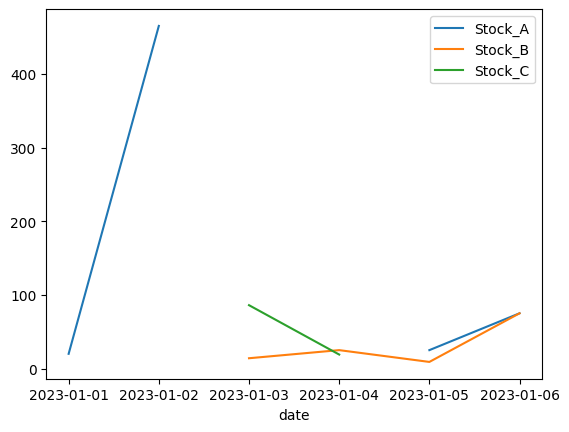

In [ ]:
## Interpolación
df.plot()

<Axes: xlabel='date'>

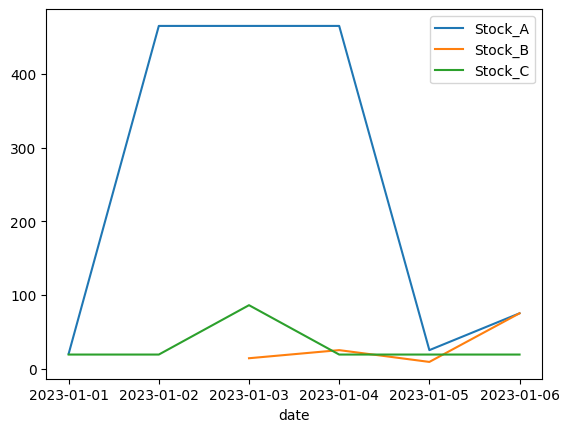

In [ ]:
## realicemos (forward)
df.ffill().plot()

<Axes: xlabel='date'>

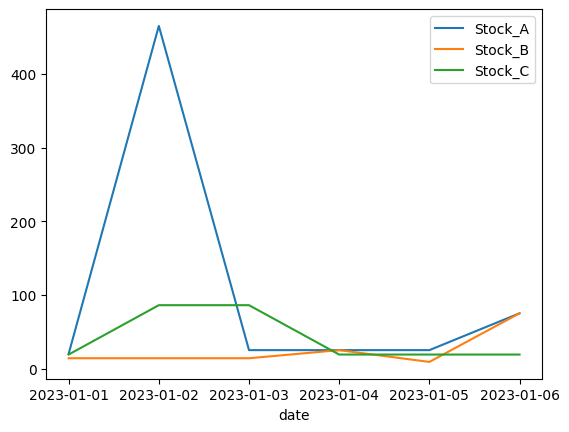

In [ ]:
## realicemos (backward)
df.bfill().plot()

<Axes: xlabel='date'>

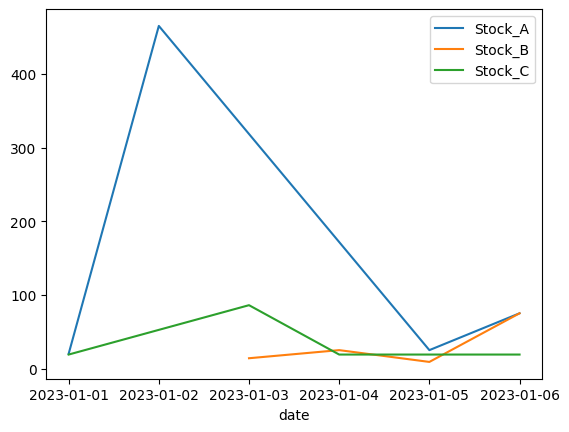

In [ ]:
##  Realicemos interpolación para ello vamos a graficar una linea y usamos los puntos de esa linea como interpolación
df.interpolate().plot()

<Axes: xlabel='date'>

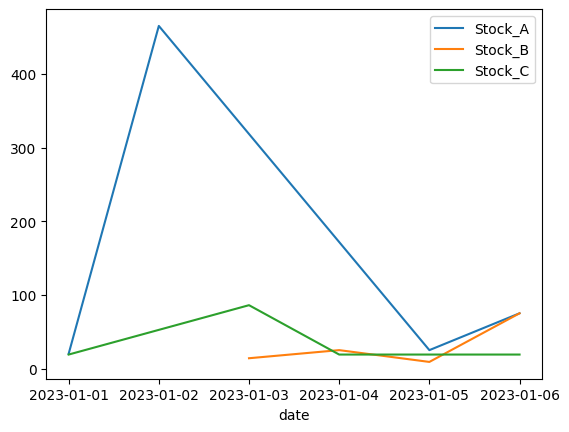

In [ ]:
df.interpolate(method='linear').plot()  ## (method='polynomial', order = 2) / (method='spline', order = 2)

In [5]:
df.index = pd.to_datetime(df.index)

<Axes: xlabel='date'>

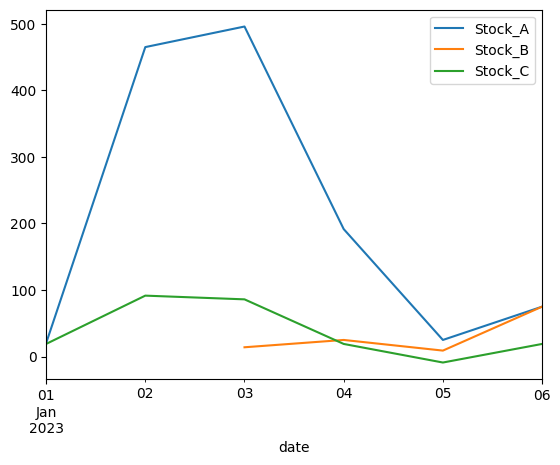

In [6]:
df.interpolate(method='polynomial', order = 2).plot()

**Continuaremos **